<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/task_8_android_app_markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apps dataset shape: (9659, 14)
Reviews dataset shape: (64295, 5)


/tmp/ipython-input-2566059632.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index[:10], x=category_counts.values[:10], palette="viridis")


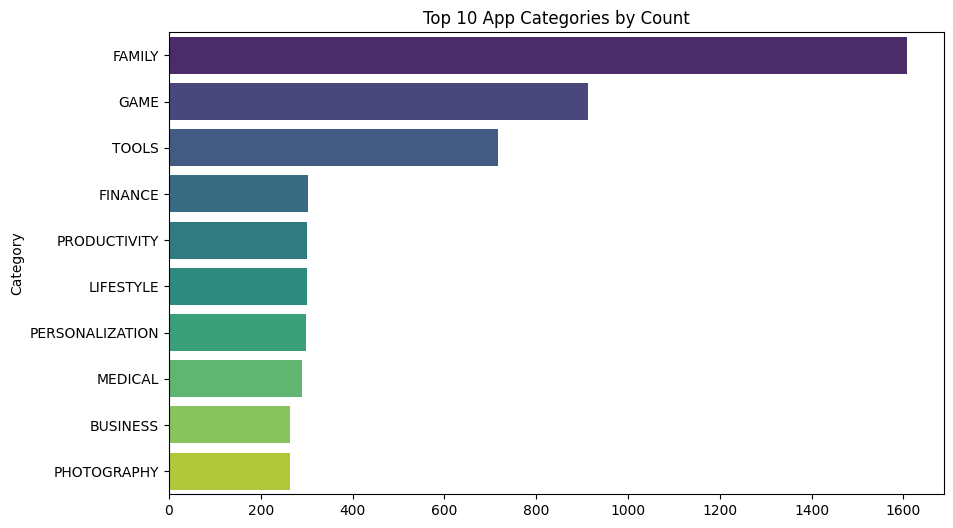

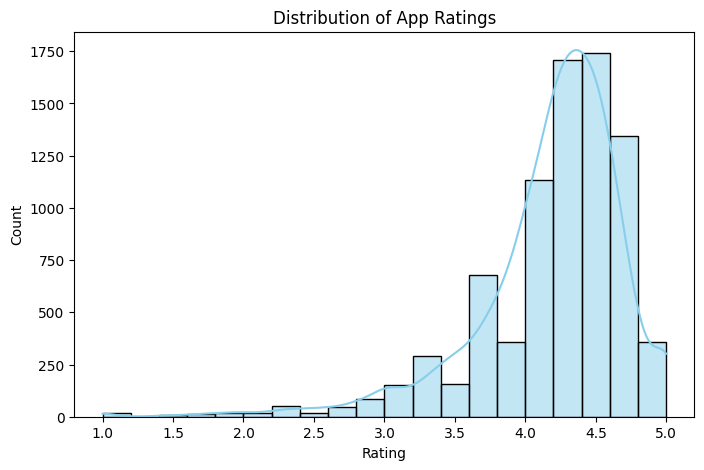

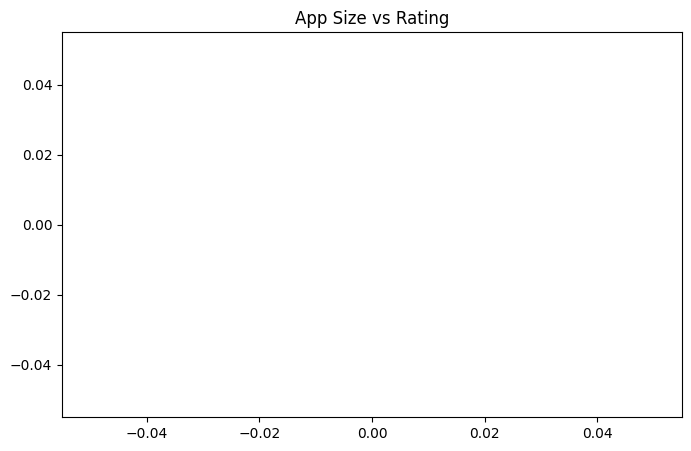

/tmp/ipython-input-2566059632.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_installs.values, y=top_installs.index, palette="coolwarm")


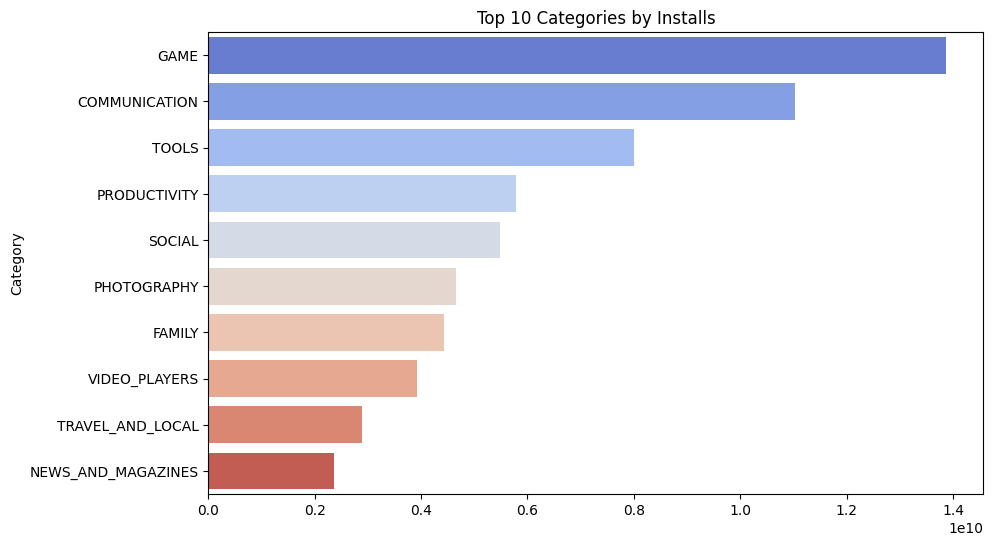

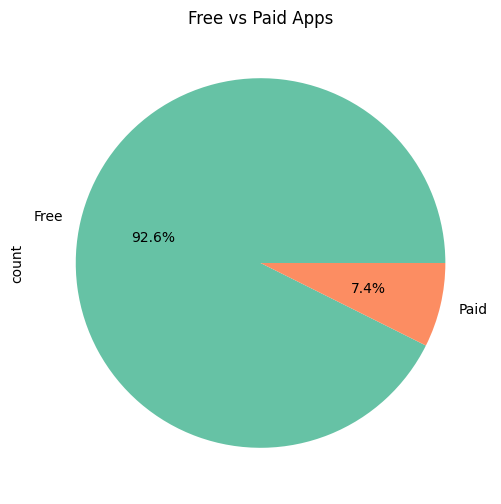

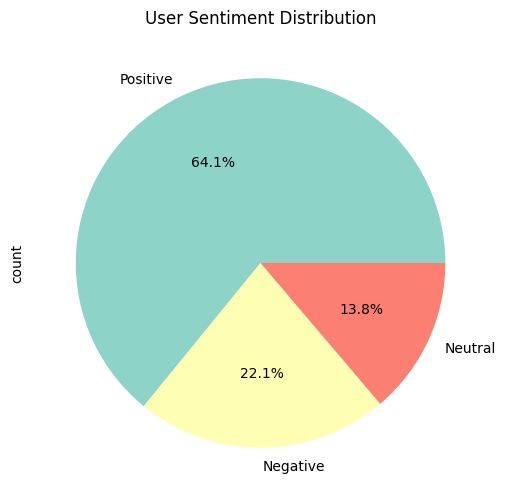

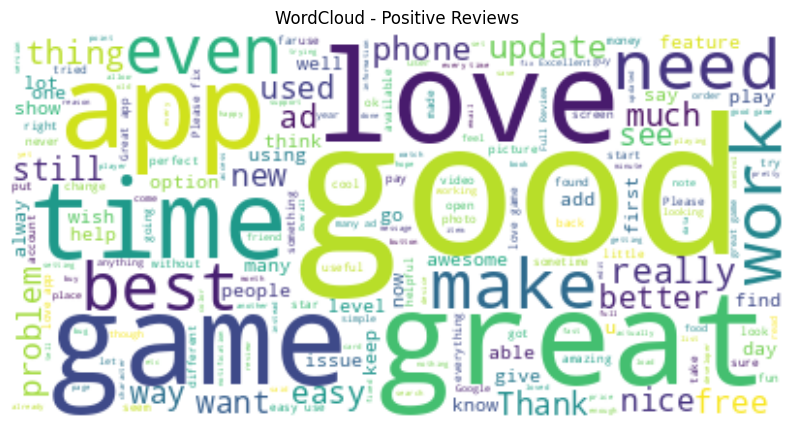

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Step 2: Load Datasets
apps = pd.read_csv("/content/apps.csv")
reviews = pd.read_csv("/content/user_reviews.csv")

print("Apps dataset shape:", apps.shape)
print("Reviews dataset shape:", reviews.shape)

# Step 3: Data Cleaning
# Remove duplicates
apps.drop_duplicates(inplace=True)

# Handle missing values
apps.dropna(subset=['Rating'], inplace=True)

# Convert Size column to numeric (MB)
def size_to_mb(size):
    if 'M' in str(size):
        return float(size.replace('M', ''))
    elif 'k' in str(size):
        return float(size.replace('k',''))/1024
    else:
        return np.nan

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].apply(size_to_mb)

# Convert Installs to numeric
apps['Installs'] = apps['Installs'].str.replace(r'\+','', regex=True).str.replace(',','', regex=True).astype(int)

# Convert Price to numeric
apps['Price'] = apps['Price'].str.replace('$','', regex=False).astype(float)

# Step 4: Category Exploration
category_counts = apps['Category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=category_counts.index[:10], x=category_counts.values[:10], palette="viridis")
plt.title("Top 10 App Categories by Count")
plt.show()

# Step 5: Metrics Analysis
# Ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of App Ratings")
plt.show()

# App Size vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=apps, x='Size', y='Rating', alpha=0.5)
plt.title("App Size vs Rating")
plt.show()

# Installs by Category (Top 10)
top_installs = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=top_installs.values, y=top_installs.index, palette="coolwarm")
plt.title("Top 10 Categories by Installs")
plt.show()

# Free vs Paid Apps
plt.figure(figsize=(6,6))
apps['Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=['#66c2a5','#fc8d62'])
plt.title("Free vs Paid Apps")
plt.show()

# Step 6: Sentiment Analysis (User Reviews)
reviews.dropna(subset=['Sentiment'], inplace=True)
sentiment_counts = reviews['Sentiment'].value_counts()
plt.figure(figsize=(6,6))
sentiment_counts.plot.pie(autopct="%1.1f%%", colors=['#8dd3c7','#ffffb3','#fb8072'])
plt.title("User Sentiment Distribution")
plt.show()

# WordCloud for Positive Reviews
positive_reviews = " ".join(reviews[reviews['Sentiment']=='Positive']['Translated_Review'].dropna())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200).generate(positive_reviews)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

# Step 7: Interactive Visualizations with Plotly
fig = px.scatter(apps, x="Size", y="Rating", size="Installs", color="Category", hover_name="App",
                 title="App Size vs Rating (Bubble size = Installs)")
fig.show()

fig2 = px.box(apps, x="Category", y="Rating", title="Rating Distribution across Categories")
fig2.update_xaxes(tickangle=45)
fig2.show()